# Media Company Case Study

## Multiple Linear Regression

### Problem Statement:
A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


### Approach:
We are concerned about determining the driver variable for show viewership. This is the case of prediction rather than projection where we are more interested in predicting the key driver variables and their impact rather than forcasting the results.

First we will list down the potential reasons for the decline in viewershp.<br>

The potential reasons could be:
1. Decline in the number of people coming to the platform
2. Fewer people watching the video
3. A Decrease in marketing spend?
4. Competitive shows, e.g. cricket/ IPL
5. Special holidays
6. Twist in the story


### Data
We have been given data for the period of 1 March 2017 to 19 May 2017.<br>
With Columns as<br> 
Views_show         : Number of times the show was viewed<br>
Visitors           : Number of visitors who browsed the platform, but not necessarily watched a video.<br>
Views_platform	   : Number of times a video was viewed on the platform<br>
Ad_impression	   : Proxy for marketing budget. Represents number of impressions generated by ads<br>
Cricket_match_india: If a cricket match was being played. 1 indicates match on a given day, 0 indicates there wasn't<br>
Character_A        : Describes presence of Character A. 1 indicates character A was in the episode, 0 indicates she/he wasn't

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# STEP 1:

In [2]:
media = pd.read_csv("mediacompany.csv")

In [3]:
media.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  Unnamed: 7  
0                    0            0         NaN  
1                    0            0         NaN  
2                    0            0         NaN  
3                    1            0         NaN  
4                    0            0         NaN

In [4]:
del media['Unnamed: 7']
media.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0  3/1/2017      183738   1260228         1706478     1060860448   
1  3/2/2017      193763   1270561         1690727     1031846645   
2  3/3/2017      210479   1248183         1726157     1010867575   
3  3/4/2017      240061   1492913         1855353     1079194579   
4  3/5/2017      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A  
0                    0            0  
1                    0            0  
2                    0            0  
3                    1            0  
4                    0            0

In [7]:
# y/Target : Views_show

In [5]:
media.tail()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
75  5/15/2017      313945   1808684         2226788     1398052759   
76  5/16/2017      185689   1814227         2199844     1311961223   
77  5/17/2017      142260   1755803         2225752     1248266254   
78  5/18/2017      135871   1749654         2302789     1284859759   
79  5/19/2017      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  
75                    1            0  
76                    1            0  
77                    1            0  
78                    1            0  
79                    1            0

In [6]:
# STEP 2

In [7]:
media.columns

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A'],
      dtype='object')

In [8]:
media.info

<bound method DataFrame.info of          Date  Views_show  Visitors  Views_platform  Ad_impression  \
0    3/1/2017      183738   1260228         1706478     1060860448   
1    3/2/2017      193763   1270561         1690727     1031846645   
2    3/3/2017      210479   1248183         1726157     1010867575   
3    3/4/2017      240061   1492913         1855353     1079194579   
4    3/5/2017      446314   1594712         2041418     1357736987   
..        ...         ...       ...             ...            ...   
75  5/15/2017      313945   1808684         2226788     1398052759   
76  5/16/2017      185689   1814227         2199844     1311961223   
77  5/17/2017      142260   1755803         2225752     1248266254   
78  5/18/2017      135871   1749654         2302789     1284859759   
79  5/19/2017      108961   1746735         2279036     1246026846   

    Cricket_match_india  Character_A  
0                     0            0  
1                     0            0  
2         

In [9]:
media.describe()

Views_show      Visitors  Views_platform  Ad_impression  \
count      80.000000  8.000000e+01    8.000000e+01   8.000000e+01   
mean   289902.625000  1.699066e+06    2.222401e+06   1.442374e+09   
std    154924.323585  2.311571e+05    2.913510e+05   2.983186e+08   
min    102520.000000  1.248183e+06    1.690727e+06   1.010868e+09   
25%    185353.250000  1.550766e+06    2.010816e+06   1.207911e+09   
50%    235807.000000  1.698843e+06    2.226270e+06   1.385931e+09   
75%    350079.000000  1.817895e+06    2.388837e+06   1.632416e+09   
max    758631.000000  2.344650e+06    3.064422e+06   2.424203e+09   

       Cricket_match_india  Character_A  
count            80.000000    80.000000  
mean              0.100000     0.375000  
std               0.301893     0.487177  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.000000     0.000000  
75%               0.000000     1.000000  
max               1.000000     1.000000

In [10]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [11]:
# Datatype of date is incorrect

In [13]:
# Step 3: Data Cleaning!

#i) Missing Values:

media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [ ]:
#ii) Outliers

medai

In [14]:
media['Date']= pd.to_datetime(media['Date'])

In [15]:
media.dtypes

Date                   datetime64[ns]
Views_show                      int64
Visitors                        int64
Views_platform                  int64
Ad_impression                   int64
Cricket_match_india             int64
Character_A                     int64
dtype: object

In [16]:
# 2 tasks : 
# 1) Create a new column to fetch day_of_week from the data
# 2) Create a new column which tells if the day was on weekday/weekend

In [17]:
media['day_of_week']=media.Date.dt.day_name()

In [19]:
media['day_type']=media.Date.dt.weekday.apply(lambda x : "Weekday" if x>=5 else 'Weekend')

In [20]:
media.head()

Date  Views_show  Visitors  Views_platform  Ad_impression  \
0 2017-03-01      183738   1260228         1706478     1060860448   
1 2017-03-02      193763   1270561         1690727     1031846645   
2 2017-03-03      210479   1248183         1726157     1010867575   
3 2017-03-04      240061   1492913         1855353     1079194579   
4 2017-03-05      446314   1594712         2041418     1357736987   

   Cricket_match_india  Character_A day_of_week day_type  
0                    0            0   Wednesday  Weekend  
1                    0            0    Thursday  Weekend  
2                    0            0      Friday  Weekend  
3                    1            0    Saturday  Weekday  
4                    0            0      Sunday  Weekday

In [21]:
# Exploratory Data Analysis

<Axes: xlabel='Date'>

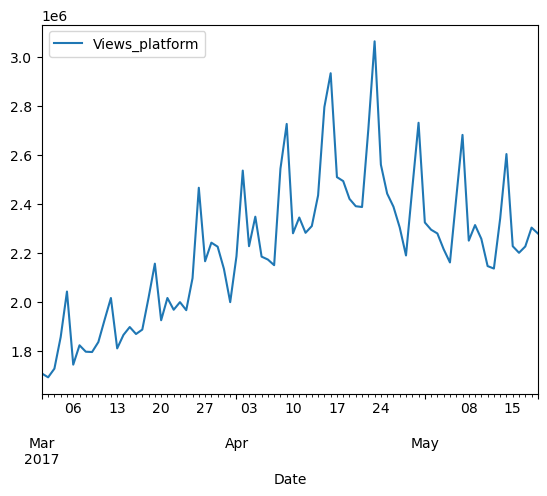

In [22]:
# Univariate

media.plot.line(x="Date",y="Views_platform")

<Axes: xlabel='day_of_week', ylabel='Views_show'>

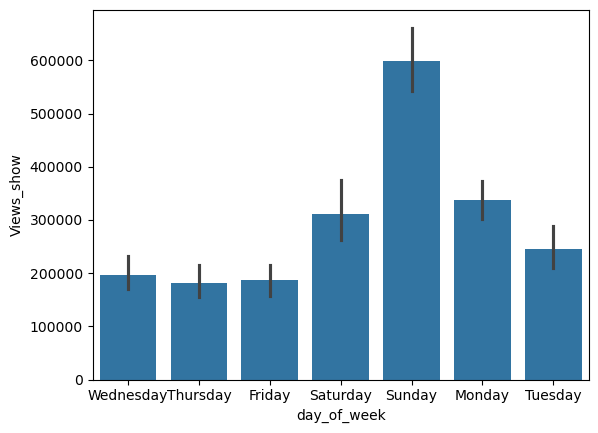

In [25]:
# day of week
import seaborn as sns
sns.barplot(data=media,x="day_of_week",y="Views_show")